In [30]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [31]:
# Reading the excel file as DataFrame

gym = pd.read_excel("/content/dataGYM.xlsx")

In [32]:
gym.head()

,Age,Height,weight,BMI,Class,Prediction
0,48,4.1,86,40,Extremely obese,Extremely obese--normal exercise+yoga+heavy di...
1,53,4.1,91,42,Extremely obese,Extremely obese--normal exercise+yoga+heavy di...
2,42,4.1,95,44,Extremely obese,Extremely obese--normal exercise+yoga+heavy di...
3,48,4.1,100,46,Extremely obese,Extremely obese--normal exercise+yoga+heavy di...
4,22,4.1,104,48,Extremely obese,Extremely obese--normal exercise+yoga+heavy di...


In [33]:
# Dropping the Prediction Column

gym = gym.drop("Prediction", axis=1)

In [34]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     1176 non-null   int64  
 1   Height  1176 non-null   float64
 2   weight  1176 non-null   int64  
 3   BMI     1176 non-null   int64  
 4   Class   1176 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 46.1+ KB


In [35]:
#Unique value count of class column

gym["Class"].value_counts()

Obese              281
Under weight       248
Healthy            232
Extremely obese    212
Overweight         199
EXtremely obese      4
Name: Class, dtype: int64

In [36]:
gym.columns = ['Age', 'Height(feet)', 'weight(kgs)', 'BMI', 'Class']
print(gym.head())

   Age  Height(feet)  weight(kgs)  BMI            Class
0   48           4.1           86   40  Extremely obese
1   53           4.1           91   42  Extremely obese
2   42           4.1           95   44  Extremely obese
3   48           4.1          100   46  Extremely obese
4   22           4.1          104   48  Extremely obese


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


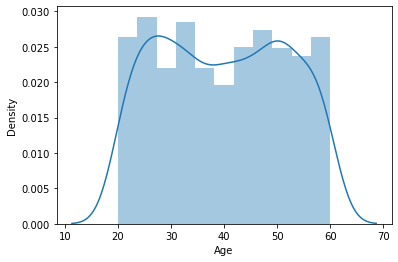

In [37]:
# Distribution of Age 

sns.distplot(gym["Age"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


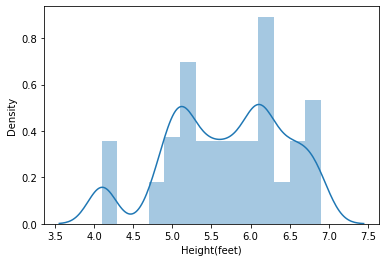

In [38]:
# Distribution of Height

sns.distplot(gym["Height(feet)"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


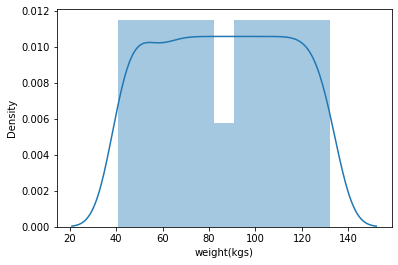

In [39]:
# Distribution of weight

sns.distplot(gym["weight(kgs)"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


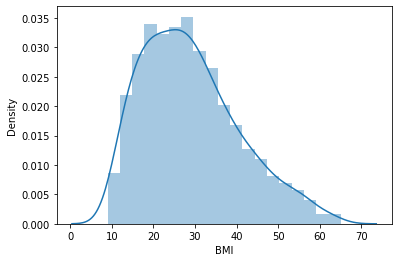

In [40]:
# Distribution of BMI

sns.distplot(gym["BMI"])

In [41]:
# Correcting the spelling errors in Class column 

gym["Class"] = gym["Class"].replace(["EXtremely obese", "Under weight"], ["Extremely obese", "Underweight"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


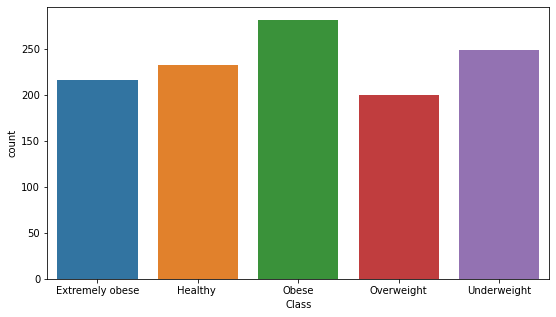

In [42]:
# Distribution of the Class column 
plt.figure(figsize=(9,5))
sns.countplot(gym["Class"])

In [43]:
#Separating the feature column

X = gym.iloc[:, :3]
X.head()

,Age,Height(feet),weight(kgs)
0,48,4.1,86
1,53,4.1,91
2,42,4.1,95
3,48,4.1,100
4,22,4.1,104


In [44]:
#Separating the target column

y = gym.iloc[:, 4]
y.head()

0    Extremely obese
1    Extremely obese
2    Extremely obese
3    Extremely obese
4    Extremely obese
Name: Class, dtype: object

In [45]:
#Splitting the training, test 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [48]:
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(940, 3)
(236, 3)
(940,)
(236,)


## Random Forest

In [84]:
#Using RandomForestClassifier

model_GYM = RandomForestClassifier(n_estimators=100)

model_GYM = model_GYM.fit(X_train, y_train)

In [85]:
#Comparing the expected and predicted variables against the model

expected = y_test
predicted = model_GYM.predict(X_test)

In [86]:
#finding the accuracy of the model 

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

                 precision    recall  f1-score   support

Extremely obese       0.91      0.95      0.93        41
       Healthy        0.77      0.80      0.78        50
          Obese       0.80      0.79      0.80        57
     Overweight       0.72      0.68      0.70        38
    Underweight       0.92      0.90      0.91        50

       accuracy                           0.83       236
      macro avg       0.82      0.82      0.82       236
   weighted avg       0.83      0.83      0.83       236

[[39  0  2  0  0]
 [ 0 40  2  4  4]
 [ 4  2 45  6  0]
 [ 0  5  7 26  0]
 [ 0  5  0  0 45]]


## Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [62]:
#Comparing the expected and predicted variables against the model

expected = y_test
predicted = classifier.predict(X_test)

In [63]:
#finding the accuracy of the model 

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

                 precision    recall  f1-score   support

Extremely obese       0.80      0.78      0.79        41
       Healthy        0.64      0.64      0.64        50
          Obese       0.60      0.67      0.63        57
     Overweight       0.45      0.39      0.42        38
    Underweight       0.84      0.84      0.84        50

       accuracy                           0.67       236
      macro avg       0.67      0.66      0.67       236
   weighted avg       0.67      0.67      0.67       236

[[32  0  9  0  0]
 [ 0 32  3  7  8]
 [ 7  1 38 11  0]
 [ 1  9 13 15  0]
 [ 0  8  0  0 42]]


## Support Vector Machine

In [66]:
# Building a Support Vector Machine on train data

svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [67]:
#Comparing the expected and predicted variables against the model

expected = y_test
predicted = svc_model.predict(X_test)

In [68]:
#finding the accuracy of the model 

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

                 precision    recall  f1-score   support

Extremely obese       0.85      0.80      0.83        41
       Healthy        0.69      0.70      0.69        50
          Obese       0.65      0.79      0.71        57
     Overweight       0.56      0.47      0.51        38
    Underweight       0.91      0.82      0.86        50

       accuracy                           0.73       236
      macro avg       0.73      0.72      0.72       236
   weighted avg       0.73      0.73      0.73       236

[[33  0  8  0  0]
 [ 0 35  3  8  4]
 [ 6  0 45  6  0]
 [ 0  7 13 18  0]
 [ 0  9  0  0 41]]


## XGBOOST

In [69]:
# Fitting XGBoost to the training data
import xgboost as xgb
xg_model = xgb.XGBClassifier()
xg_model.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [70]:
#Comparing the expected and predicted variables against the model

expected = y_test
predicted = xg_model.predict(X_test)

In [71]:
#finding the accuracy of the model 

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

                 precision    recall  f1-score   support

Extremely obese       0.90      0.93      0.92        41
       Healthy        0.81      0.76      0.78        50
          Obese       0.73      0.82      0.78        57
     Overweight       0.57      0.55      0.56        38
    Underweight       0.96      0.88      0.92        50

       accuracy                           0.80       236
      macro avg       0.79      0.79      0.79       236
   weighted avg       0.80      0.80      0.80       236

[[38  0  3  0  0]
 [ 0 38  0 10  2]
 [ 4  0 47  6  0]
 [ 0  3 14 21  0]
 [ 0  6  0  0 44]]


### Pickle

In [87]:
#Importing the pickle file to flatten the model

import pickle

In [88]:
#Creating a Model_GYM pickle file

pickle.dump(model_GYM, open("Model.pkl", "wb"))

In [89]:
model = pickle.load(open("Model.pkl", "rb"))

In [92]:
print(model.predict([[24, 6, 60]]))

['Underweight']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [91]:
print(model.predict([[40, 5.5, 70]]))

['Overweight']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
